# IDS ML Algorithm Using KDD-99 Dataset

- Removed categories which has less frequency of occurance on features like **flag** and **services**.

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
def load_dataset():
    df = pd.read_csv('Datasets/KDD-99_Dataset.csv')
    df.drop(['num_outbound_cmds',
          'is_host_login',
          'urgent',
          'id'], axis = 'columns' , inplace = True)
    
    #freq = df['service'].value_counts()
    #frequent_values = freq[freq < 1000].index
    #to_del1 = df[df['service'].isin(frequent_values)].index.tolist()
    #df = df.drop(to_del1)
    
    df['protocol_type'] = LabelEncoder().fit_transform(df['protocol_type'])
    df['flag'] = LabelEncoder().fit_transform(df['flag'])
    df['service'] = LabelEncoder().fit_transform(df['service'])
    
    df['outcome'] = df['outcome'].apply(lambda x: x.replace('.', ''))

    df['class'] = df['outcome'].map( {'back':1, 'buffer_overflow':1, 'ftp_write':1,
                                      'guess_passwd':1, 'imap':1, 'ipsweep':1,
                                      'land':1, 'loadmodule':1, 'multihop':1,
                                      'neptune':1, 'nmap':1, 'perl':1,
                                      'phf':1, 'pod':1, 'portsweep':1,
                                      'rootkit':1, 'satan':1, 'smurf':1,
                                      'spy':1,'teardrop':1,'warezclient':1,
                                      'warezmaster':1, 'normal':0} )
    df = df.drop(['outcome'],axis='columns')
    df.rename(columns=lambda x: x.strip(), inplace=True)
    limit = df.shape[1]-1
    
    X = df.iloc[:,0:limit].values # train set features
    Y = df.iloc[:,limit].values # train set labels
    
    return X, Y, df

In [8]:
X, Y , df = load_dataset()
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,24,9,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,0
1,0,1,24,9,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,0
2,0,1,24,9,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,0
3,0,1,24,9,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,0
4,0,1,24,9,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.00,0.0,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898425,0,1,24,9,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,0
4898426,0,1,24,9,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,0
4898427,0,1,24,9,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,0
4898428,0,1,24,9,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,0


In [10]:
X = X.reshape(X.shape[0],X.shape[1])
Y = Y.reshape(Y.shape[0],1)

print('Shape of X :',X.T.shape)
print('Shape of Y :',Y.T.shape)
print('# of training examples :',X.T.shape[1])

Shape of X : (38, 4898430)
Shape of Y : (1, 4898430)
# of training examples : 4898430


In [11]:
df.groupby('class')['class'].count()

class
0     972780
1    3925650
Name: class, dtype: int64

In [12]:
train_X, test_X , train_Y , test_Y = train_test_split(X, Y, test_size=0.1,shuffle=True)

print('Training X :',train_X.shape)
print('Test_X :',test_X.shape)
print('Training_Y :',train_Y.shape)
print('Test_Y :',test_Y.shape)

Training X : (4408587, 38)
Test_X : (489843, 38)
Training_Y : (4408587, 1)
Test_Y : (489843, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [15]:
train_X, val_X , train_Y , val_Y = train_test_split(train_X,train_Y, test_size=0.1,shuffle=True)

print('Training X :',train_X.shape)
print('Validation X :',val_X.shape)
print('Test_X :',test_X.shape)
print('Training_Y :',train_Y.shape)
print('Validation Y :',val_Y.shape)
print('Test_Y :',test_Y.shape)

Training X : (3967728, 38)
Validation X : (440859, 38)
Test_X : (489843, 38)
Training_Y : (3967728, 1)
Validation Y : (440859, 1)
Test_Y : (489843, 1)


In [16]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [17]:
model = Sequential()
model.add(Dense(128, input_dim=38, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4992      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 71,169
Trainable params: 71,169
Non-trainable params: 0
__________________________________________________

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    verbose=1,
    patience=20,
    mode='min',
    restore_best_weights=True)

In [20]:
exe = model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=40,callbacks = [early_stopping], batch_size=512)

Train on 3967728 samples, validate on 440859 samples
Epoch 1/40
3967728/3967728 [==============================] - 51s 13us/step - loss: 0.0250 - tp: 1587473.6250 - fp: 1861.2723 - tn: 392082.3438 - fn: 2837.3652 - accuracy: 0.9957 - precision: 0.9967 - recall: 0.9978 - auc: 0.9988 - val_loss: 0.0129 - val_tp: 3351450.7500 - val_fp: 2358.7876 - val_tn: 829228.9375 - val_fn: 5617.8633 - val_accuracy: 0.9981 - val_precision: 0.9993 - val_recall: 0.9983 - val_auc: 0.9996
Epoch 2/40
3967728/3967728 [==============================] - 48s 12us/step - loss: 0.0126 - tp: 5115527.0000 - fp: 2808.2363 - tn: 1266284.7500 - fn: 8195.8037 - accuracy: 0.9983 - precision: 0.9995 - recall: 0.9984 - auc: 0.9996 - val_loss: 0.0114 - val_tp: 6879579.0000 - val_fp: 3240.6379 - val_tn: 1703696.5000 - val_fn: 10729.7354 - val_accuracy: 0.9984 - val_precision: 0.9995 - val_recall: 0.9985 - val_auc: 0.9997
Epoch 3/40
3967728/3967728 [==============================] - 50s 13us/step - loss: 0.0114 - tp: 8643544

3967728/3967728 [==============================] - 48s 12us/step - loss: 0.0083 - tp: 68634336.0000 - fp: 16864.9180 - tn: 17008530.0000 - fn: 87537.9922 - accuracy: 0.9995 - precision: 0.9996 - recall: 0.9987 - auc: 0.9999 - val_loss: 0.0078 - val_tp: 70398944.0000 - val_fp: 17268.5957 - val_tn: 17445976.0000 - val_fn: 89580.1016 - val_accuracy: 0.9994 - val_precision: 0.9998 - val_recall: 0.9987 - val_auc: 0.9999
Epoch 21/40
3967728/3967728 [==============================] - 48s 12us/step - loss: 0.0083 - tp: 72163440.0000 - fp: 17681.1738 - tn: 17883366.0000 - fn: 91613.9297 - accuracy: 0.9995 - precision: 0.9996 - recall: 0.9987 - auc: 0.9999 - val_loss: 0.0110 - val_tp: 73928408.0000 - val_fp: 18056.6113 - val_tn: 18320636.0000 - val_fn: 93791.0781 - val_accuracy: 0.9995 - val_precision: 0.9998 - val_recall: 0.9987 - val_auc: 0.9999
Epoch 22/40
3967728/3967728 [==============================] - 48s 12us/step - loss: 0.0082 - tp: 75692936.0000 - fp: 18445.6934 - tn: 18757816.0000 -

Epoch 39/40
3967728/3967728 [==============================] - 48s 12us/step - loss: 0.0078 - tp: 135692112.0000 - fp: 32810.5078 - tn: 33624416.0000 - fn: 164650.0469 - accuracy: 0.9996 - precision: 0.9999 - recall: 0.9989 - auc: 1.0000 - val_loss: 0.0074 - val_tp: 137456992.0000 - val_fp: 33237.7617 - val_tn: 34061736.0000 - val_fn: 166637.2969 - val_accuracy: 0.9997 - val_precision: 0.9998 - val_recall: 0.9988 - val_auc: 0.9999
Epoch 40/40
3967728/3967728 [==============================] - 48s 12us/step - loss: 0.0078 - tp: 139221680.0000 - fp: 33665.0977 - tn: 34498876.0000 - fn: 168656.7812 - accuracy: 0.9996 - precision: 0.9999 - recall: 0.9989 - auc: 1.0000 - val_loss: 0.0072 - val_tp: 140986464.0000 - val_fp: 34121.3242 - val_tn: 34936272.0000 - val_fn: 170594.8750 - val_accuracy: 0.9997 - val_precision: 0.9998 - val_recall: 0.9988 - val_auc: 0.9999


In [21]:
results = model.evaluate(train_X, train_Y)
for i in range(0,len(results)):
    print((str(i)+': {:0.4f}').format(results[i]))


3967728/3967728 [==============================] - 132s 33us/step
0: 0.0072
1: 142939360.0000
2: 34558.0469
3: 35368944.0000
4: 172270.3438
5: 1.0000
6: 1.0000
7: 0.9996
8: 1.0000


In [22]:
def plot_metrics(history):
  metrics =  ['loss', 'accuracy', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'accuracy':
      plt.ylim([0.985,1])
    elif metric == 'precision':
      plt.ylim([0.99,1])
    elif metric == 'recall':
      plt.ylim([0.99,1])

    plt.legend()

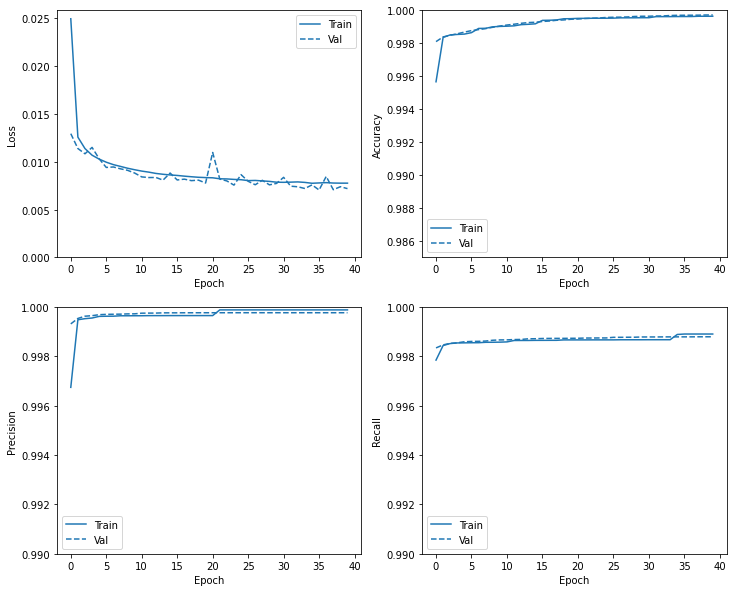

In [23]:
plot_metrics(exe)

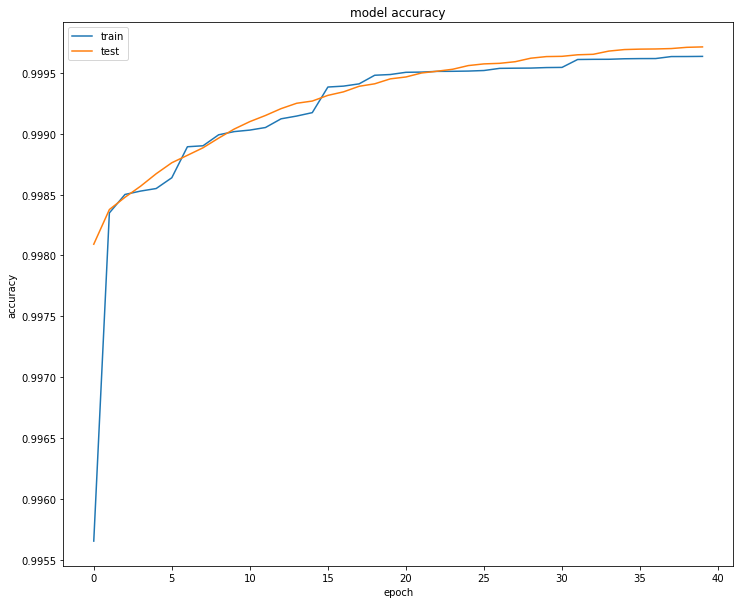

In [24]:
# summarize history for accuracy
plt.plot(exe.history['accuracy'])
plt.plot(exe.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

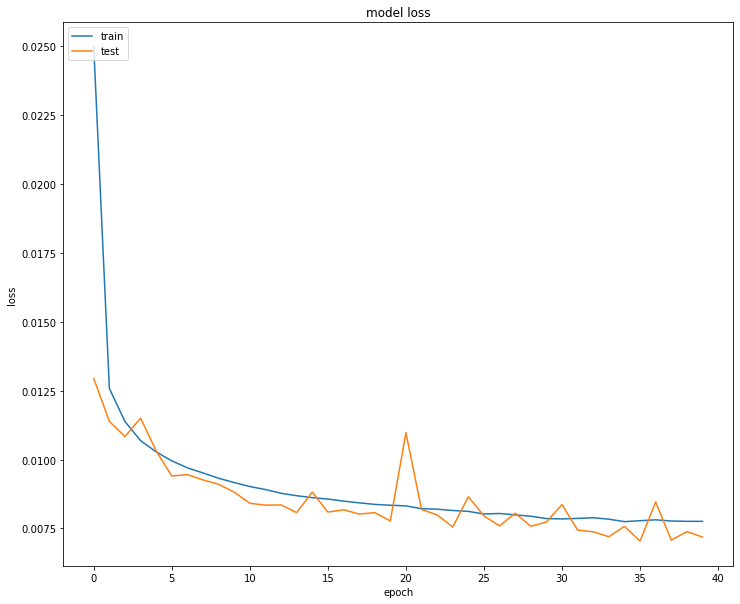

In [25]:
# summarize history for loss
plt.plot(exe.history['loss'])
plt.plot(exe.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
results_test = model.evaluate(test_X, test_Y)
for i in range(0,len(results_test)):
    print((str(i)+': {:0.4f}').format(results_test[i]))

489843/489843 [==============================] - 18s 36us/step
0: 0.0072
1: 144919248.0000
2: 35016.6172
3: 35821656.0000
4: 173771.9531
5: 0.9998
6: 0.9999
7: 0.9990
8: 1.0000


In [46]:
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier

In [44]:
test_predictions = model.predict(test_X)

In [47]:
classifier = KerasClassifier(model, batch_size=128)
y_pred_keras = classifier.predict(test_X)

AttributeError: 'KerasClassifier' object has no attribute 'model'

In [28]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives : ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives : ', cm[1][1])
    print('Total Transactions: ', np.sum(cm[1]))

In [29]:
import numpy as np

True Negatives :  97315
False Positives:  116
False Negatives:  350
True Positives :  392062
Total Transactions:  392412


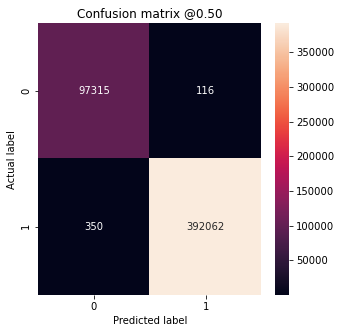

In [30]:
plot_cm(test_Y, test_predictions)

In [31]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(test_Y, test_pred_bool))

TypeError: Singleton array 0 cannot be considered a valid collection.

In [33]:
count = 0
predictions = model.predict_classes(test_X)
for i in range(0,485128):
    if predictions[i] != test_Y[i]:
        #print('%s => %d (expected %d)' % (test_X[i].tolist(), predictions[i], test_Y[i]))
        count = count + 1
print('Number of incorrect predictions = ',count)
print('Number of correct predictions   = ', (485128-count))
print('Test set accuracy               =  '+ str(((485128-count)/485128)*100) + '%')

Number of incorrect predictions =  460
Number of correct predictions   =  484668
Test set accuracy               =  99.90517966392375%
